Importing the Dependencies

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
import matplotlib.pyplot as plt

Data Collection and Processing

In [3]:

# Load the CSV data into a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [5]:
# Display first 5 rows of the dataset
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [7]:

# Display last 5 rows of the dataset
print(heart_data.tail())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  


In [9]:

# Check the number of rows and columns
print("Shape of the data:", heart_data.shape)

Shape of the data: (303, 14)


In [ ]:
# Get information about the dataset
print("Dataset Info:")
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Check for missing values
print("Missing values in each column:")
print(heart_data.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
# Statistical measures about the data
print("Statistical summary:")
print(heart_data.describe())

Statistical summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std   

In [15]:

# Check the distribution of the target variable
print("Target variable distribution:")
print(heart_data['target'].value_counts())

Target variable distribution:
target
1    165
0    138
Name: count, dtype: int64


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [17]:
# Splitting the Features and Target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

print("Features (X):")
print(X)
print("Target (Y):")
print(Y)

Features (X):
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2   

Splitting the Data into Training data & Test Data

In [19]:
# Splitting the Data into Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print("Shape of X:", X.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X: (303, 13)
Shape of X_train: (242, 13)
Shape of X_test: (61, 13)


Cross Validation

In [39]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dimensionality reduction (if necessary)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Logistic Regression with adjusted parameters
log_reg = LogisticRegression(solver='saga', max_iter=5000, class_weight='balanced')
cv_scores = cross_val_score(log_reg, X_pca, Y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.85245902 0.8852459  0.75409836 0.86666667 0.73333333]
Mean cross-validation score: 0.8183606557377049


Random Forest

In [41]:
# Feature Importance using Random Search and Random Forest
random_forest = RandomForestClassifier(random_state=42)

Random Searching

In [43]:
# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, Y_train)

print("Best Random Forest parameters:", random_search.best_params_)
print("Best Random Forest score:", random_search.best_score_)

Best Random Forest parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best Random Forest score: 0.8551870748299318


In [45]:
# Select features based on importance
selector = SelectFromModel(random_search.best_estimator_, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print("Shape of selected features (training):", X_train_selected.shape)

Shape of selected features (training): (242, 5)


C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Model Training

Logistic Regression

In [51]:
# Logistic Regression on selected features
log_reg.fit(X_train_selected, Y_train)
log_reg_accuracy = accuracy_score(Y_test, log_reg.predict(X_test_selected))
print("Logistic Regression accuracy on selected features:", log_reg_accuracy)

Logistic Regression accuracy on selected features: 0.819672131147541


In [47]:

# Random Forest on selected features
random_forest.fit(X_train_selected, Y_train)
rf_accuracy = accuracy_score(Y_test, random_forest.predict(X_test_selected))
print("Random Forest accuracy on selected features:", rf_accuracy)

Random Forest accuracy on selected features: 0.7540983606557377


In [53]:

# Building a Predictive System using Logistic Regression
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
input_data_selected = selector.transform(input_data_as_numpy_array)

prediction = log_reg.predict(input_data_selected)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have Heart Disease


In [61]:

# Saving the trained Logistic Regression model
filename = 'heart_disease_logreg_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [57]:

# Loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [65]:
# List of feature names
feature_names = ['age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Serum Cholesterol', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise-Induced Angina', 'ST Depression Induced by Exercise', 'Slope of the Peak Exercise ST Segment', 'Number of Major Vessels', 'Thal']

# Iterate over the feature names list
for column in feature_names:
    print(column)

age
Sex
Chest Pain Type
Resting Blood Pressure
Serum Cholesterol
Fasting Blood Sugar
Resting Electrocardiographic Results
Maximum Heart Rate Achieved
Exercise-Induced Angina
ST Depression Induced by Exercise
Slope of the Peak Exercise ST Segment
Number of Major Vessels
Thal


In [67]:
# Overfitting and Underfitting Analysis
# Train the model on the full training data
log_reg.fit(X_train_selected, Y_train)


LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')

In [69]:

# Predict on the training and test data
train_predictions = log_reg.predict(X_train_selected)
test_predictions = log_reg.predict(X_test_selected)


In [71]:

# Calculate the accuracy on the training and test data
train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Training accuracy: 0.8347107438016529
Test accuracy: 0.819672131147541


Over Fitting Check 

In [73]:
# Overfitting Check
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is performing well and is neither overfitting nor underfitting.")

The model is overfitting.


In [75]:

# Plot learning curve to visualize overfitting or underfitting
train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train_selected, Y_train, cv=5)

In [77]:
# Calculate the mean and std for each learning curve score
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

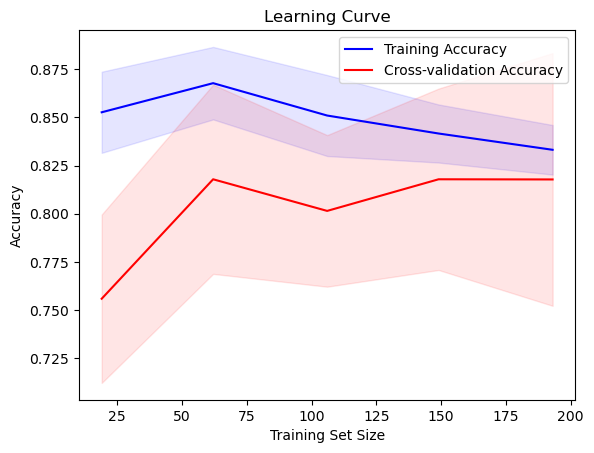

In [79]:
# Plotting the learning curve
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation Accuracy", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.1)

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

Building a Predictive System

Saving the trained model